# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

#reading csv with twitter archive
df_archive=pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#setting current folder
folder=os.path.curdir

#requesting file and saving file in current folder
link="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
responce=requests.get(link)

with open (os.path.join(folder,link.split("/")[-1]), mode="wb") as file:
    file.write(responce.content)

#reading file
df_image=pd.read_csv("image-predictions.tsv", sep="\t")


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweetpy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
#reading tweets from 'tweet_json.txt' that we create on previous step.
df_tweets=pd.read_json('tweet_json.txt',lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
#starting visual assessment
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
1074,739844404073074688,NaN,NaN,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
2134,670069087419133954,NaN,NaN,2015-11-27 02:38:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Randall. He's from Chernobyl. Built pl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670069087...,5,10,Randall,None,None,None,None
1845,675845657354215424,NaN,NaN,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,None,None,pupper,None


In [5]:
#programmatic assessment
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
#checking dog stage data
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [8]:
#checking duplicates
sum(df_archive.duplicated())

0

In [9]:
#visual assessment of image df
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#programmatic assessment of image df
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#programmatic assessment of api df tweets
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [12]:
#visual assessment of api df tweets
df_tweets.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2017,NaN,NaN,2015-12-02 18:48:47,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672125270745333761, 'id_str'...",2578,False,This is just impressive I have nothing else to...,NaN,...,0.0,NaN,NaN,NaN,1253,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1276,NaN,NaN,2016-03-13 03:13:29,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1941,False,This is Lucy. She doesn't understand fetch. 8/...,NaN,...,0.0,NaN,NaN,NaN,745,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
348,NaN,NaN,2017-02-14 23:43:18,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831650039864885250, 'id_str'...",7908,False,"I usually only share these on Friday's, but th...",NaN,...,0.0,NaN,NaN,NaN,2243,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
455,NaN,NaN,2017-01-09 00:53:55,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 818259456588812288, 'id_str'...",12197,False,This is Florence. He saw the same snap you sen...,NaN,...,0.0,NaN,NaN,NaN,2621,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
775,NaN,NaN,2016-09-14 17:40:06,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776113296390942720, 'id_str'...",13102,False,This is Sampson. He's about to get hit with a ...,NaN,...,0.0,NaN,NaN,NaN,5068,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality issues
1. Remove reply (in_reply_to_status_id,in_reply_to_user_id) and retweet records(retweeted_status_id, retweeted_status_user_id), source column from copy_archive

2. timestamp is object data type-> should be date
 
3. copy_archive contains tweets not related to dogs("None", "a", "an", "the", "very" etc. in Names)

4. copy_archive rating_numerator/rating_denominator incorect values 716439118184652801 (11/10), 778027034220126208 (11.27/10). Change type of rating numerator to float.

5. Wrong name in 765395769549590528 tweet. Should be Zoey. Wrong name in 720389942216527872 tweet. Should be Ralphe

6. copy_archive add missing retweet count and favorite count

7. doggo, floofer, pupper, and puppo columns in df_archive is not blank or true\false. Current values are None or column name

8. Add Dog breed based on neural network predictions

### Tidiness issues
1.dog "stage" (i.e. doggo, floofer, pupper, and puppo) are columns->should be records with column "dog_stage"

2.Tweet text contains short link

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
copy_archive=df_archive.copy()
copy_image=df_image.copy()
copy_tweets=df_tweets.copy()


### Issue #1:Remove reply and retweet records, source column from df_archive

#### Define: 
##### remove records where in_reply_to_status is not empty (copy_archive)
##### remove records where retweeted_status_id is not empty (copy_archive)
##### remove source column (copy_archive)

#### Code

In [14]:
copy_archive=copy_archive[copy_archive.in_reply_to_status_id.isna()]
copy_archive=copy_archive[copy_archive.retweeted_status_id.isna()]

#### Test

In [15]:
copy_archive[copy_archive.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
copy_archive[copy_archive.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
print("Replyed and retweet records were removed.\nResults:Copy df \
=Original df is {}, record difference {}".format(copy_archive.shape[0]==df_archive.shape[0]\
                           ,copy_archive.shape[0]-df_archive.shape[0]))

Replyed and retweet records were removed.
Results:Copy df =Original df is False, record difference -259


In [18]:
copy_archive.drop(["in_reply_to_status_id","in_reply_to_user_id",\
                   "retweeted_status_id","retweeted_status_user_id",\
                   "retweeted_status_timestamp","source"],axis=1, inplace=True)

### Issue #2: timestamp is object data type-> should be date

#### change data type for timestamp 

#### Code

In [19]:
copy_archive["timestamp"]=pd.to_datetime(copy_archive.timestamp)

#### Test

In [20]:
copy_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 196.6+ KB


### Issue #3: df_archive contains tweets not related to dogs("None", "a", "an", "the", "very" in Names)

#### create list of values that not related with dog names
#### remove records that not related with dogs by using list above

#### Code

In [21]:
not_names_list=["None", "a", "an", "the", "very"]
for names in not_names_list:
    copy_archive=copy_archive[copy_archive["name"] !=names]
    

#### Test

In [22]:
copy_archive.name.all in not_names_list

False

### Issue #4: df_archive rating_numerator/rating_denominator incorect values 716439118184652801 (11/10), 778027034220126208 (11.27/10). Change type of rating numerator to float.

### For copy_archive do:
#### Change type of rating numerator to float.
#### correct value  rating_numerator/rating_denominator for 716439118184652801 (11/10), 
#### correct value  rating_numerator/rating_denominator for 778027034220126208 (11.27/10)

#### Code

In [23]:
copy_archive.rating_numerator=copy_archive.rating_numerator.astype(float)

In [24]:
copy_archive.loc[copy_archive.tweet_id==716439118184652801, "rating_numerator"]=11
copy_archive.loc[copy_archive.tweet_id==716439118184652801, "rating_denominator"]=10
copy_archive.loc[copy_archive.tweet_id==778027034220126208, "rating_numerator"]=11.27

#### Test

In [25]:
copy_archive[copy_archive["tweet_id"]==716439118184652801]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.0,10,Bluebert,None,None,None,None


In [26]:
copy_archive[copy_archive["tweet_id"]==778027034220126208]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None


### Issue #5: 
### Wrong name in 765395769549590528 tweet. Should be Zoey
### Wrong name in 720389942216527872 tweet. Should be Ralphe

#### check names and fix issues

#### Code

In [27]:
copy_archive.loc[copy_archive.tweet_id==765395769549590528,"name"]="Zoey"

In [28]:
copy_archive.loc[copy_archive.tweet_id==720389942216527872,"name"]="Ralphe"

#### Test

In [29]:
copy_archive.loc[copy_archive.tweet_id==765395769549590528,"name"]=="Zoey"

852    True
Name: name, dtype: bool

In [30]:
copy_archive.loc[copy_archive.tweet_id==720389942216527872,"name"]=="Ralphe"

1172    True
Name: name, dtype: bool

### Issue #6: copy_archive -add missing retweet count and favorite count

#### take retweet_count and favorite_count and move those columns into copy_archive

#### Code

In [31]:
copy_archive=pd.merge(copy_archive,copy_tweets[["id","retweet_count","favorite_count"]],left_on="tweet_id",right_on="id")
copy_archive.drop(["id"],axis=1, inplace=True)

#### Test

In [32]:
copy_archive.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,6514,33819


In [33]:
copy_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1420
Data columns (total 13 columns):
tweet_id              1421 non-null int64
timestamp             1421 non-null datetime64[ns]
text                  1421 non-null object
expanded_urls         1421 non-null object
rating_numerator      1421 non-null float64
rating_denominator    1421 non-null int64
name                  1421 non-null object
doggo                 1421 non-null object
floofer               1421 non-null object
pupper                1421 non-null object
puppo                 1421 non-null object
retweet_count         1421 non-null int64
favorite_count        1421 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 155.4+ KB


### Issue #7: doggo, floofer, pupper, and puppo columns in df_archive is not blank or true\false. Current values are None or column name

#### Replace wrog data for 854010172552949760 from doggo to floofer
#### Replace wrog data for 855851453814013952 from  puppo to doggo
#### Replace wrog data for 817777686764523521 from  doggo to pupper
#### Replace None values by False and value by True

#### Code

In [34]:
copy_archive.loc[copy_archive.tweet_id==854010172552949760, "floofer"]=True
copy_archive.loc[copy_archive.tweet_id==854010172552949760, "doggo"]=False
copy_archive.loc[copy_archive.tweet_id==855851453814013952, "doggo"]=True
copy_archive.loc[copy_archive.tweet_id==855851453814013952, "puppo"]=False
copy_archive.loc[copy_archive.tweet_id==817777686764523521, "doggo"]=False


In [35]:
copy_archive.loc[copy_archive.doggo=="None", "doggo"]=False
copy_archive.loc[copy_archive.doggo=="doggo", "doggo"]=True
copy_archive.loc[copy_archive.floofer=="None","floofer"]=False
copy_archive.loc[copy_archive.floofer=="floofer","floofer"]=True
copy_archive.loc[copy_archive.pupper=="None","pupper"]=False
copy_archive.loc[copy_archive.pupper=="pupper","pupper"]=True
copy_archive.loc[copy_archive.puppo=="None","puppo"]=False
copy_archive.loc[copy_archive.puppo=="puppo","puppo"]=True

In [36]:
copy_archive["no_data_dog_stage"]=np.where(sum([copy_archive["doggo"], copy_archive["floofer"], copy_archive["puppo"], copy_archive["pupper"]])==0,True,False)

In [37]:
copy_archive.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,no_data_dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,False,False,False,False,8853,39467,True
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,False,False,False,False,6514,33819,True


#### Test

In [38]:
#colmn data type for doggo, floofer, pupper, puppo is bool
copy_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1420
Data columns (total 14 columns):
tweet_id              1421 non-null int64
timestamp             1421 non-null datetime64[ns]
text                  1421 non-null object
expanded_urls         1421 non-null object
rating_numerator      1421 non-null float64
rating_denominator    1421 non-null int64
name                  1421 non-null object
doggo                 1421 non-null bool
floofer               1421 non-null bool
pupper                1421 non-null bool
puppo                 1421 non-null bool
retweet_count         1421 non-null int64
favorite_count        1421 non-null int64
no_data_dog_stage     1421 non-null bool
dtypes: bool(5), datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 118.0+ KB


### Issue #8: Add Dog breed based on neural network predictions

#### create dataframe base on predictions that will have predicted breed
#### Merge it with copy_archive

#### Code

In [39]:
df_dog_breed=pd.DataFrame(columns=["id","breed"])
for i in range(copy_image.shape[0]):
    if copy_image.iloc[i].img_num==1:
        df_dog_breed=df_dog_breed.append\
        ({"id": copy_image.iloc[i]["tweet_id"],\
          "breed":copy_image.iloc[i]["p1"]}, ignore_index=True)
    elif copy_image.iloc[i].img_num==2:
         df_dog_breed=df_dog_breed.append\
        ({"id": copy_image.iloc[i]["tweet_id"],\
          "breed":copy_image.iloc[i]["p2"]}, ignore_index=True)
    else:
         df_dog_breed=df_dog_breed.append\
        ({"id": copy_image.iloc[i]["tweet_id"],\
          "breed":copy_image.iloc[i]["p3"]}, ignore_index=True)


In [40]:
df_dog_breed.id=df_dog_breed.id.astype("int")
df_dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
id       2075 non-null int64
breed    2075 non-null object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


In [41]:
copy_archive=pd.merge(copy_archive,df_dog_breed,how="left",left_on="tweet_id", right_on="id")

#### Test

In [42]:
#breed exist
copy_archive.drop(["id"],axis=1, inplace=True)
copy_archive.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,no_data_dog_stage,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,False,False,False,False,8853,39467,True,orange
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,False,False,False,False,6514,33819,True,Chihuahua


In [43]:
copy_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1420
Data columns (total 15 columns):
tweet_id              1421 non-null int64
timestamp             1421 non-null datetime64[ns]
text                  1421 non-null object
expanded_urls         1421 non-null object
rating_numerator      1421 non-null float64
rating_denominator    1421 non-null int64
name                  1421 non-null object
doggo                 1421 non-null bool
floofer               1421 non-null bool
pupper                1421 non-null bool
puppo                 1421 non-null bool
retweet_count         1421 non-null int64
favorite_count        1421 non-null int64
no_data_dog_stage     1421 non-null bool
breed                 1375 non-null object
dtypes: bool(5), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 129.1+ KB


### Tidiness issue #1: dog "stage" (i.e. doggo, floofer, pupper, and puppo) are columns->should be records with column "dog_stage"

#### I will use "melt" for pivote columns to dog "stage" 

#### Code

In [44]:
copy_archive = pd.melt(copy_archive, id_vars=["tweet_id", "timestamp", "text", "expanded_urls", "rating_numerator","rating_denominator","name","retweet_count","favorite_count","breed"],
                           var_name='dog_stage',value_name='dog_stage_value')

In [45]:
copy_archive=copy_archive[copy_archive.dog_stage_value==True]
copy_archive.drop(["dog_stage_value"],axis=1, inplace=True)

#### Test

In [46]:
copy_archive.head(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,breed,dog_stage
7,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,7711,32467,Pembroke,doggo
30,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,3128,20771,German_shepherd,doggo
72,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,3628,20730,briard,doggo
80,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,3327,16476,Chihuahua,doggo
145,846514051647705089,2017-03-28 00:07:32,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13.0,10,Barney,13076,48410,Leonberg,doggo


In [47]:
copy_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 7 to 7104
Data columns (total 11 columns):
tweet_id              1425 non-null int64
timestamp             1425 non-null datetime64[ns]
text                  1425 non-null object
expanded_urls         1425 non-null object
rating_numerator      1425 non-null float64
rating_denominator    1425 non-null int64
name                  1425 non-null object
retweet_count         1425 non-null int64
favorite_count        1425 non-null int64
breed                 1379 non-null object
dog_stage             1425 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 133.6+ KB


### Tidiness issue #2: Tweet text contains short link

#### short link should be extracted from tweet text and placed as additional column

#### Code

In [48]:
copy_archive["tweet_link"]=copy_archive.text.str.extract(r'(https?://\S+)', expand=True)
copy_archive["text"]=copy_archive.text.replace(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', regex=True)


In [49]:
copy_archive.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,breed,dog_stage,tweet_link
7,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,7711,32467,Pembroke,doggo,https://t.co/t1bfwz5S2A
30,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,3128,20771,German_shepherd,doggo,https://t.co/YSI00BzTBZ
72,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,3628,20730,briard,doggo,https://t.co/PR7B7w1rUw
80,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,3327,16476,Chihuahua,doggo,https://t.co/DsA2hwXAJo
145,846514051647705089,2017-03-28 00:07:32,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13.0,10,Barney,13076,48410,Leonberg,doggo,https://t.co/cFAasDXauK


#### Test

In [50]:
copy_archive.iloc[0].text

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate '

In [51]:
copy_archive.iloc[0].tweet_link

'https://t.co/t1bfwz5S2A'

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
copy_archive.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [53]:
copy_archive.name.nunique()

949

In [54]:
copy_archive.breed.nunique()

300

In [66]:
text_len=copy_archive.text.str.len()
text_len.describe()

count    1425.000000
mean      101.083509
std        23.432293
min        17.000000
25%        85.000000
50%       109.000000
75%       117.000000
max       144.000000
Name: text, dtype: float64

### Insights:
1. We can say that the most frequently we will meet Tweets with 100-120 characters long. 

2. The tweets contain 949 unique dog names

3. The tweets contain 300 unique breeds

4. Based on date information and the number of tweets, looks like this account releases more tweets year-to-year. Unfortunately, we can't fully be sure about this, because we have a limited database.

### Visualization

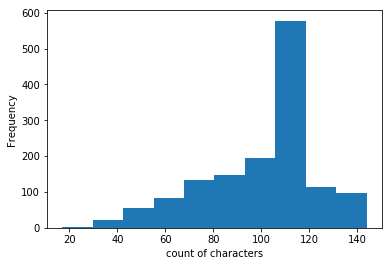

In [67]:
text_len.plot.hist()
plt.xlabel("count of characters");

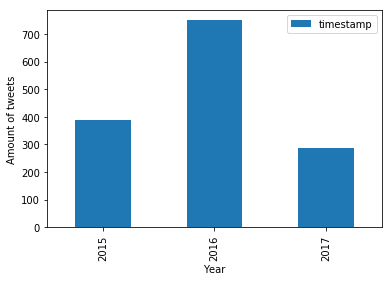

In [55]:
x=copy_archive.timestamp.dt.year.value_counts()
x=pd.DataFrame(x)
x.sort_index().plot(kind='bar' )
plt.xlabel("Year")
plt.ylabel("Amount of tweets");